### **Time Series using the Prophet**

### **1. Load the Data**
- You begin by installing the Prophet library and importing necessary packages.
- including pandas, numpy, seaborn, matplotlib, and warnings. The data is then loaded into a DataFrame called `temp_df:`

In [27]:
##Installing the Prophet Module
!pip install fbprophet -q

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (fbprophet)


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet

In [30]:


temp_df = pd.read_csv('/content/daily-minimum-temperatures-in-me (1).csv')

In [31]:


temp_df.shape


(3650, 2)

In [32]:

temp_df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


### **2. Data Preprocessing**

In [33]:
#checking for null values
temp_df.isna().sum()


,0
Date,0
Daily minimum temperatures,0


In [34]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [35]:

#unwanted character
temp_df[temp_df['Daily minimum temperatures'] == '?0.2']

,Date,Daily minimum temperatures
565,7/20/1982,?0.2


In [36]:

#eliminating every character except for 0 to 9
temp_df['Daily minimum temperatures'] = temp_df['Daily minimum temperatures'].str.replace(r'[^0-9\.\-]', '', regex=True)


In [37]:
#coverting the 'Date' column to datetime datatype
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

#coverting the 'Temp' column to Float datatype
temp_df['Daily minimum temperatures'] = temp_df['Daily minimum temperatures'].astype('float')



In [38]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [39]:
temp_df.head()

,Date,Daily minimum temperatures
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8



### **Prophet expects the data in this specific format:**

- ds:
 - Column for the date/time values
- y:
 - Column for the values you want to forecast

In [40]:

#renaming the columns
temp_df.rename(columns = {'Date' : 'ds',
                          'Daily minimum temperatures' : 'y'},
               inplace = True)


In [41]:
temp_df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### **3. Model Training**

In [42]:
model = Prophet()

In [43]:

model.fit(temp_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmrpe9im/pf0sbf55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmrpe9im/1mi7qp56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96878', 'data', 'file=/tmp/tmppmrpe9im/pf0sbf55.json', 'init=/tmp/tmppmrpe9im/1mi7qp56.json', 'output', 'file=/tmp/tmppmrpe9im/prophet_modeledjc1369/prophet_model-20241004070511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **5. Forecasting**
- You create a DataFrame for future dates (in this case, 10 days into the future) and generate forecasts using the trained model:

In [44]:

future = model.make_future_dataframe(periods=10, freq = 'D')

In [45]:
forecast = model.predict(future)


In [46]:

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.845441,11.770995,18.371344,11.845441,11.845441,3.328357,3.328357,3.328357,0.010971,0.010971,0.010971,3.317386,3.317386,3.317386,0.0,0.0,0.0,15.173798
1,1981-01-02,11.843590,11.864684,18.742846,11.843590,11.843590,3.375348,3.375348,3.375348,-0.019836,-0.019836,-0.019836,3.395184,3.395184,3.395184,0.0,0.0,0.0,15.218939
2,1981-01-03,11.841740,11.689608,18.531682,11.841740,11.841740,3.412345,3.412345,3.412345,-0.060155,-0.060155,-0.060155,3.472501,3.472501,3.472501,0.0,0.0,0.0,15.254085
3,1981-01-04,11.839889,11.624299,18.449415,11.839889,11.839889,3.394984,3.394984,3.394984,-0.153103,-0.153103,-0.153103,3.548087,3.548087,3.548087,0.0,0.0,0.0,15.234873
4,1981-01-05,11.838038,11.975346,18.846191,11.838038,11.838038,3.600999,3.600999,3.600999,-0.019721,-0.019721,-0.019721,3.620720,3.620720,3.620720,0.0,0.0,0.0,15.439037


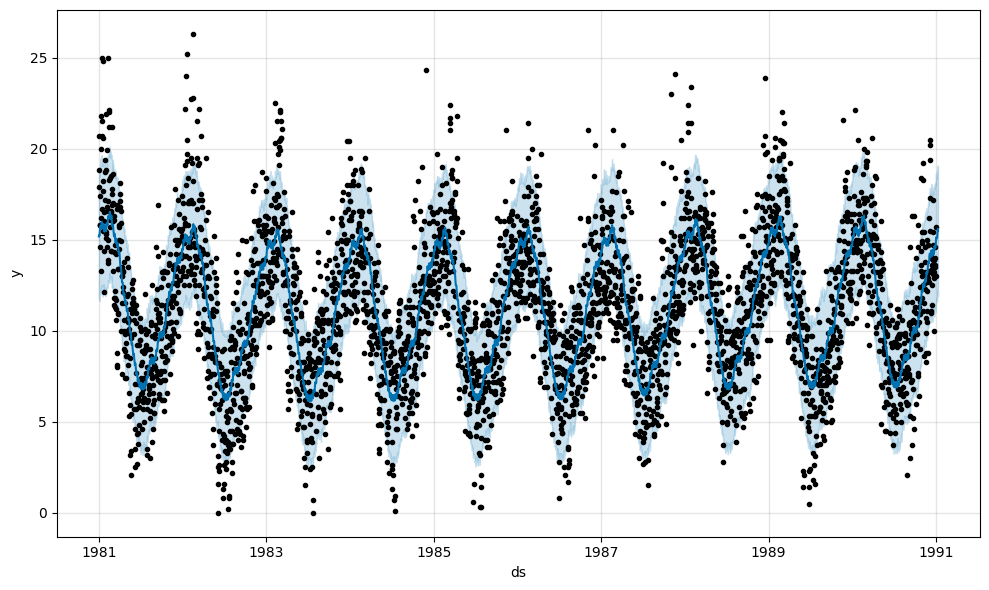

In [47]:


fig = model.plot(forecast)


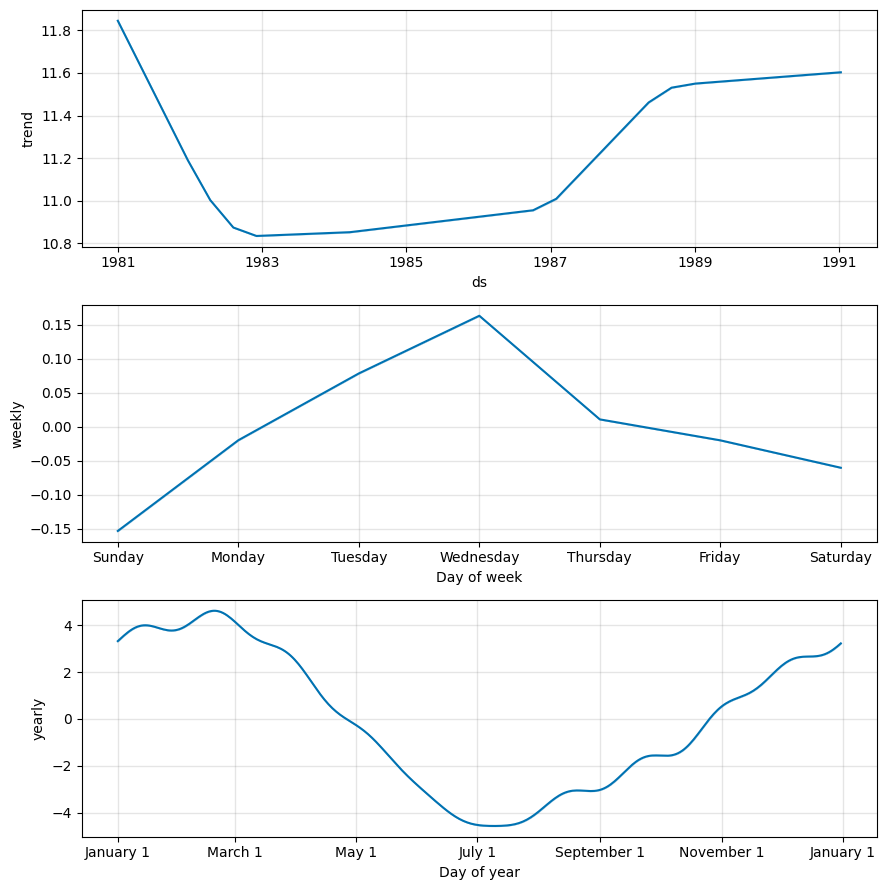

In [48]:


comp = model.plot_components(forecast)

#### Summary of the Steps:-
Data Cleaning:
 - Handle missing or invalid values, ensuring that data types are appropriate for analysis.

Data Formatting:
 - Structure the DataFrame to meet Prophet's input requirements.

Model Training:
- Fit the Prophet model to the historical data.

Forecasting:
- Generate future predictions and visualize the results.

**Differences Compared to ARIMA/SARIMAX
Ease of Use:**

- Prophet is designed to be user-friendly and requires less statistical knowledge than ARIMA models.
 - You don’t need to determine the seasonal and non-seasonal components manually.

- Seasonality:
 - Prophet automatically detects seasonality patterns in the data, while ARIMA/SARIMAX requires manual specification of seasonal parameters (p, d, q).

- Robustness to Missing Data:
 - Prophet can handle missing dates and is robust to outliers in the data.

- Trend Modeling:
 - Prophet has built-in support for modeling trends and seasonalities, whereas ARIMA requires additional steps for seasonality handling.